In [71]:
from uxsim import *
from uxsim.OSMImporter import OSMImporter

W = World(
    name="",
    deltan=5,
    tmax=7200,
    print_mode=1, save_mode=1, show_mode=0, 
    random_seed=0
)

In [3]:
import tqdm as notebook_tqdm

In [72]:
# nodes, links = OSMImporter.import_osm_data(north=35.817, south=35.570, east=139.881, west=139.583, custom_filter='["highway"~"motorway"]')
# nodes, links = OSMImporter.import_osm_data(north=28.500, south=28.652, east=77.322, west=77.166, custom_filter='["highway"~"trunk|primary|mortorway|primary|secondary|residential|tertiary"]')
nodes, links = OSMImporter.import_osm_data(north=28.6975, south=28.6777, east=77.218, west=77.202, custom_filter='["highway"~"trunk|primary|mortorway|primary|secondary|residential|tertiary"]')


Start downloading OSM data. This may take some time.


Download completed
imported network size:
 number of links: 970
 number of nodes: 375


In [4]:
import csv

def save_nodes_and_links_to_csv(nodes, links, nodes_file='nodes.csv', links_file='links.csv'):
    """Save nodes and links to CSV files."""
    # Save nodes to CSV
    with open(nodes_file, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['id', 'longitude', 'latitude'])  # Write header
        writer.writerows(nodes)  # Write node data
    
    # Save links to CSV
    with open(links_file, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['name', 'start_node_id', 'end_node_id', 'attribute1', 'attribute2'])  # Write header
        writer.writerows(links)  # Write link data

def read_nodes_and_links_from_csv(nodes_file='nodes1.csv', links_file='links1.csv'):
    """Read nodes and links from CSV files."""
    nodes = []
    links = []
    # Read nodes from CSV
    with open(nodes_file, 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # Skip header
        for row in reader:
            nodes.append([int(row[0]), float(row[1]), float(row[2])])
    
    # Read links from CSV
    with open(links_file, 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # Skip header
        for row in reader:
            links.append([row[0], int(row[1]), int(row[2]), int(row[3]), float(row[4])])
    
    return nodes, links

In [31]:
save_nodes_and_links_to_csv(nodes, links)

In [37]:
import pandas as pd

# Load the links.csv and nodes1.csv files into pandas DataFrames
links_df = pd.read_csv('links.csv')
nodes_df = pd.read_csv('nodes1.csv')

# Convert the 'id' column in nodes_df to string to match with link node IDs
nodes_df['id'] = nodes_df['id'].astype(str)

# Filter links where either start_node_id or end_node_id is not present in nodes_df
filtered_links_df = links_df[(links_df['start_node_id'].astype(str).isin(nodes_df['id'])) & 
                             (links_df['end_node_id'].astype(str).isin(nodes_df['id']))]

# Save the filtered links to links1.csv
filtered_links_df.to_csv('links1.csv', index=False)


In [5]:
nodes_read, links_read = read_nodes_and_links_from_csv()

In [67]:
nodes2, links2 = OSMImporter.osm_network_postprocessing(nodes_read, links_read, node_merge_threshold=0.0008, node_merge_iteration=5)
OSMImporter.osm_network_to_World(W, nodes2, links2, default_jam_density=0.2, coef_degree_to_meter=111000)


aggregated network size:
 number of links: 124
 number of nodes: 56


In [16]:
nodes2

[[2935766124, 77.216873, 28.6971887],
 [6419226649, 77.2086166, 28.6971717],
 [9849998452, 77.2119685, 28.6971201],
 [6257738690, 77.2095124, 28.6971121],
 [9849590808, 77.2110706, 28.6970317],
 [2971778134, 77.2135482, 28.69663],
 [2511131247, 77.2105999, 28.6965844],
 [10279621410, 77.2113886, 28.696401],
 [2935766117, 77.2163589, 28.6961784],
 [9849590802, 77.213327, 28.696173],
 [9181767901, 77.211914, 28.6960884],
 [6642826785, 77.2076122, 28.6957197],
 [4556160784, 77.2134994, 28.6955948],
 [10908515339, 77.2135334, 28.6954734],
 [9849990920, 77.2118119, 28.6953373],
 [2969962409, 77.2123009, 28.6951496],
 [6639619874, 77.2072914, 28.6951393],
 [10908515326, 77.21519, 28.6948366],
 [2935766111, 77.2156915, 28.6947886],
 [9849636923, 77.2115607, 28.6947711],
 [2958094342, 77.2157719, 28.6946186],
 [2969962400, 77.212496, 28.6944576],
 [8989350687, 77.2093911, 28.694149],
 [2945828444, 77.217514, 28.6939832],
 [6362190794, 77.211954, 28.6932698],
 [10713708181, 77.2160509, 28.69295

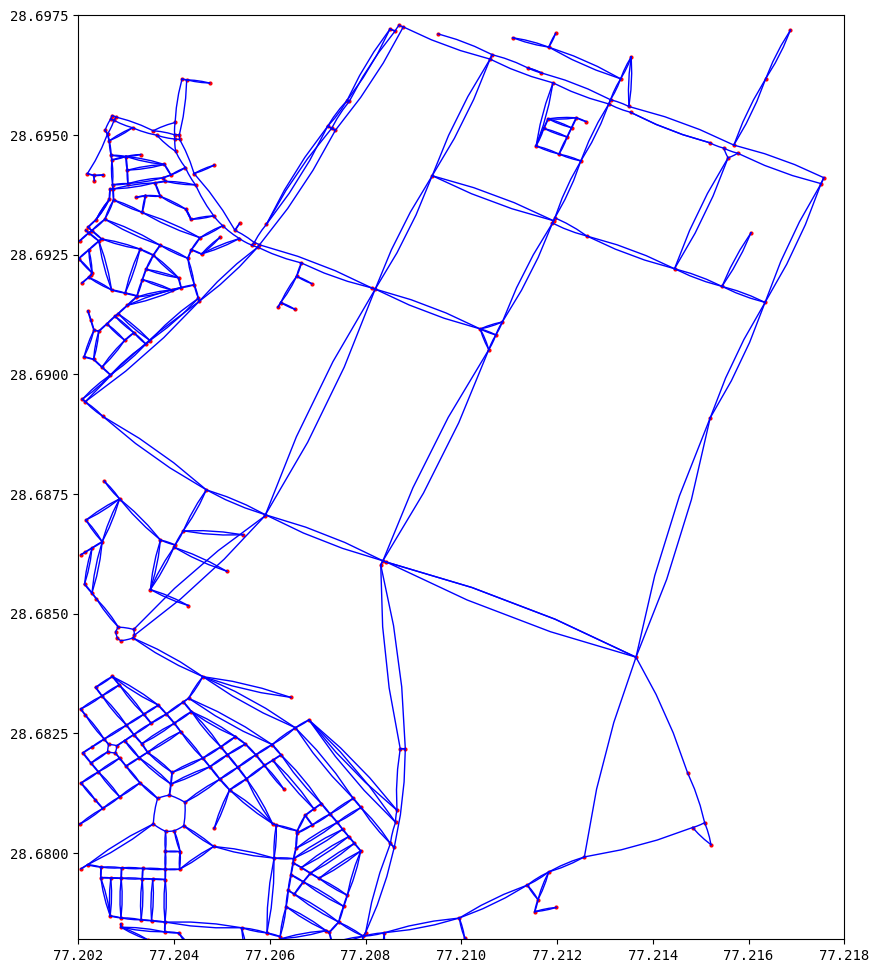

In [73]:
OSMImporter.osm_network_visualize(nodes, links, show_link_name=0,xlim=[77.202, 77.218], ylim=[28.6782, 28.6975])


In [68]:
W.adddemand_area2area(77.208, 28.6850, 0, 77.210, 28.6875, 0.05, 0, 3600, flow=5)
W.adddemand_area2area(77.210, 28.6950, 0, 77.212, 28.6925, 0.05, 3600, 7200, flow=5)
#W.adddemand_point2point(77.208, 28.6850, 77.210, 28.6975, 0, 7200, flow=3)

In [69]:
W.exec_simulation()


simulation setting:
 scenario name: 
 simulation duration:	 7200 s
 number of vehicles:	 35750 veh
 total road length:	 28853.2440735866 m
 time discret. width:	 5 s
 platoon size:		 5 veh
 number of timesteps:	 1440
 number of platoons:	 7150
 number of links:	 124
 number of nodes:	 56
 setup time:		 25.78 s
simulating...
      time| # of vehicles| ave speed| computation time
       0 s|        0 vehs|   0.0 m/s|     0.00 s


     600 s|      190 vehs|   7.6 m/s|     1.64 s
    1200 s|      200 vehs|   7.8 m/s|     3.75 s
    1800 s|      245 vehs|   7.8 m/s|     5.59 s
    2400 s|      310 vehs|   7.6 m/s|     7.42 s
    3000 s|      345 vehs|   7.8 m/s|     9.04 s
    3600 s|      350 vehs|   7.8 m/s|    10.80 s
    4200 s|      530 vehs|   7.5 m/s|    12.64 s
    4800 s|      515 vehs|   7.7 m/s|    14.46 s
    5400 s|      615 vehs|   7.3 m/s|    16.26 s
    6000 s|      675 vehs|   7.6 m/s|    18.05 s
    6600 s|      675 vehs|   7.7 m/s|    19.67 s
    7195 s|      750 vehs|   7.3 m/s|    21.30 s
 simulation finished


1

results:
 average speed:	 7.9 m/s
 number of completed trips:	 11930 / 35750
 average travel time of trips:	 2462.1 s
 average delay of trips:	 2332.9 s
 delay ratio:			 0.948
 generating animation...


100%|██████████| 60/60 [00:44<00:00,  1.34it/s]


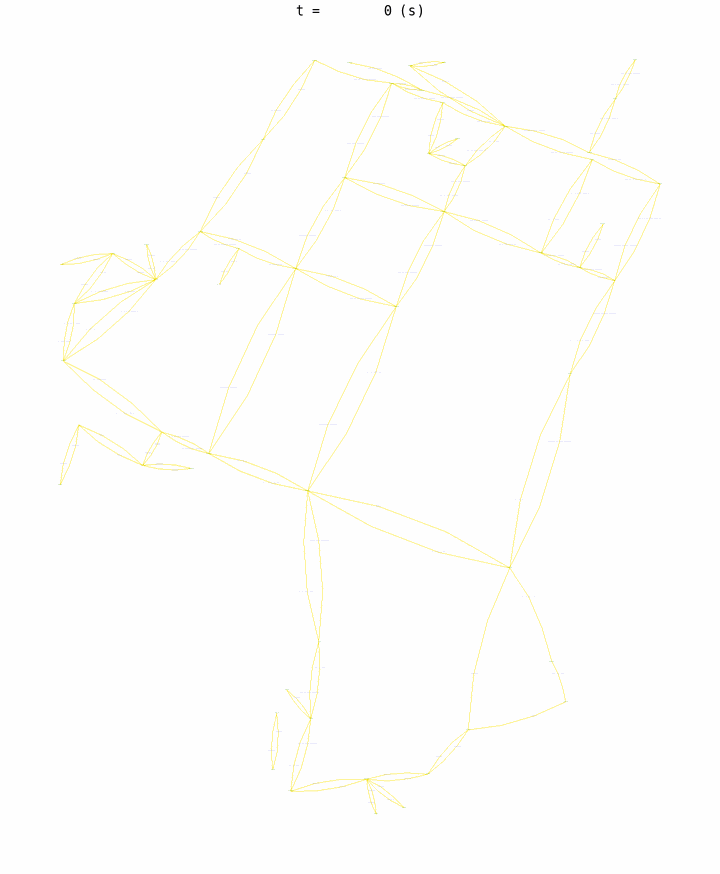

In [70]:
W.analyzer.print_simple_stats()
W.analyzer.network_anim(animation_speed_inverse=15, detailed=0, network_font_size=1)
# W.analyzer.network_fancy(animation_speed_inverse=15, sample_ratio=0.1, interval=10, trace_length=5,network_font_size=1)
from IPython.display import display, Image
with open("out/anim_network0.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))